In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/surabaya-house-prices-old.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5262 non-null   float64
 1   num_bedroom      5300 non-null   int64  
 2   num_bathroom     5300 non-null   int64  
 3   garage_capacity  5300 non-null   int64  
 4   land_area        5300 non-null   int64  
 5   building_area    5300 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 248.6 KB


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop(df[df["num_bedroom"] == 0].index, inplace=True)
df.drop(df[df["num_bathroom"] == 0].index, inplace=True)

In [5]:
df[df["land_area"] < df["building_area"]]
df.drop(df[df["land_area"] < df["building_area"]].index, inplace=True)

In [6]:
df.sort_values("land_area", ascending=False).head(10)
df.drop(df[df["land_area"] > 5000].index, inplace=True)

In [7]:
df.sort_values("building_area", ascending=False).head(10)
df.drop(df[df["building_area"] > 8000].index, inplace=True)

In [8]:
df.sort_values("price", ascending=False).head(10)
df.drop(df[df["building_area"] > 8000].index, inplace=True)

In [9]:
df.duplicated().sum()

np.int64(327)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
count,1.673000e+03,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000
mean,5.015374e+09,3.302451,2.245666,0.928870,279.133293,201.683204
std,9.699533e+09,1.678915,1.531572,1.235087,325.358488,223.225759
min,3.500000e+07,1.000000,1.000000,0.000000,24.000000,0.000000
25%,1.010000e+09,2.000000,1.000000,0.000000,100.000000,77.000000
50%,2.000000e+09,3.000000,2.000000,1.000000,180.000000,138.000000
75%,4.300000e+09,4.000000,3.000000,1.000000,332.000000,250.000000
max,1.100000e+11,24.000000,30.000000,16.000000,3852.000000,3490.000000


In [12]:
df.corr()

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
price,1.000000,0.363565,0.411750,0.295243,0.741648,0.685764
num_bedroom,0.363565,1.000000,0.672124,0.216030,0.448247,0.494186
num_bathroom,0.411750,0.672124,1.000000,0.196103,0.474595,0.531428
garage_capacity,0.295243,0.216030,0.196103,1.000000,0.236970,0.244400
land_area,0.741648,0.448247,0.474595,0.236970,1.000000,0.880534
building_area,0.685764,0.494186,0.531428,0.244400,0.880534,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1673 entries, 0 to 5296
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1673 non-null   float64
 1   num_bedroom      1673 non-null   int64  
 2   num_bathroom     1673 non-null   int64  
 3   garage_capacity  1673 non-null   int64  
 4   land_area        1673 non-null   int64  
 5   building_area    1673 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 91.5 KB


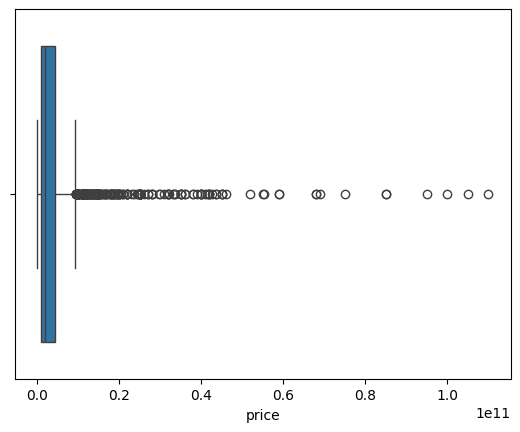

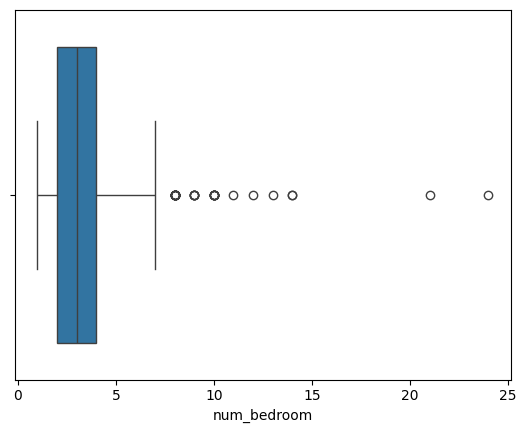

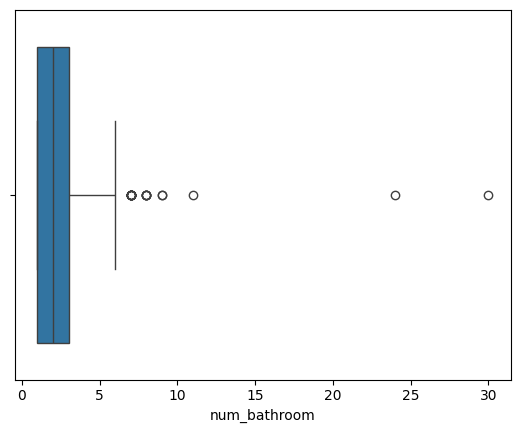

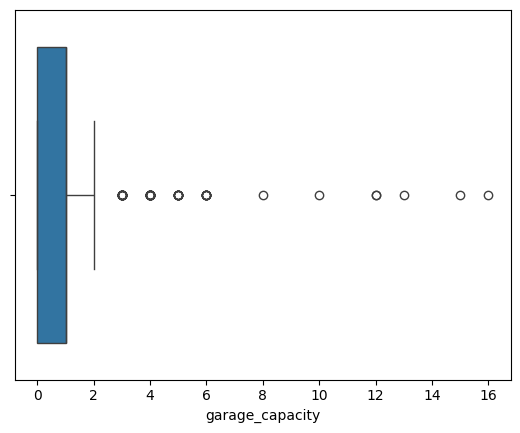

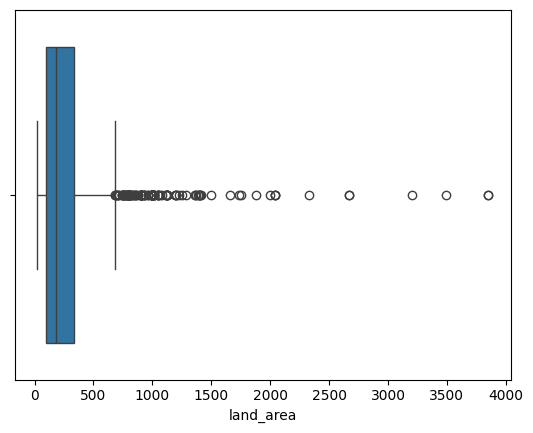

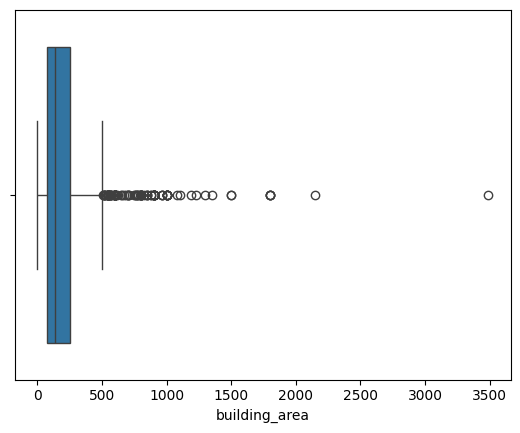

In [14]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

In [15]:
df.to_csv("data/surabaya-house-prices-cleaned.csv", index=False)

In [16]:
from sklearn.preprocessing import StandardScaler

X = df.drop("price", axis=1)
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=0
)

In [18]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)


def evaluation_metric(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return [f"{mae:.5f}", f"{mse:.5f}", f"{rmse:.5f}", f"{r2:.5f}"]

In [19]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    "rf": RandomForestRegressor(random_state=0),
    "gb": GradientBoostingRegressor(random_state=0),
    "ridge": RidgeCV(),
    "linreg": LinearRegression(),
    "lasso": LassoCV(random_state=0),
    "tree": DecisionTreeRegressor(random_state=0),
}


results = []

for model in models.values():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(evaluation_metric(y_test, y_pred))


evaluation_df = pd.DataFrame(
    data=results,
    columns=["MAE", "MSE", "RMSE", "R-squared"],
)

evaluation_df["Method"] = [name for name in models.keys()]
evaluation_df.set_index("Method", inplace=True)

evaluation_df.sort_values("R-squared", ascending=False)

,MAE,MSE,RMSE,R-squared
Method,,,,
gb,1865979156.50714,21727865433674727424.00000,4661315847.87758,0.77533
rf,2028421868.26720,28582714835762884608.00000,5346280467.36821,0.70444
lasso,2574986515.61726,37064710946949210112.00000,6088079413.65331,0.61674
ridge,2653755827.34424,37924379628581019648.00000,6158277326.37797,0.60785
linreg,2670758274.82155,38512364040575270912.00000,6205833065.79989,0.60177
tree,2644545484.72278,61952163698821603328.00000,7870969679.70412,0.35939


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [399, 400, 401], # 400
    'max_features': [None, "sqrt", "log2", 0.1, 1, 2], # "sqrt"
    'max_depth': [12, 13, 14], # 13
    'min_samples_leaf': [0.1, 1, 2], # 1
    'min_samples_split': [10, 11, 12], # 11

}

rf = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# 4. Latih GridSearchCV pada data training
grid_search.fit(X_train, y_train)

# 5. Ambil hasil terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 6. Evaluasi model terbaik pada data testing
y_pred = best_model.predict(X_test)
evaluation_metric(y_test, y_pred)


c:\Users\munaf\Documents\semester 3\Mesin Pembelajaran\praktikum\uas_github\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 400}


['2089979063.82849',
 '24630177542480703488.00000',
 '4962879964.54485',
 '0.74531']

In [21]:
param_grid = {
    'max_depth': [80, 90, 100, 110], # int, default=None
    'max_features': [2, 3], # {"sqrt", "log2", None}, int or float, default=1.0
    'min_samples_leaf': [3, 4, 5], # int or float, default=1
    'min_samples_split': [8, 10, 12], # int or float, default=2
    'n_estimators': [100, 200, 300, 1000] # int, default=100
}

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [19, 20, 21], # 20
    'learning_rate': [0.1, 0.2], # 0.2
    'max_depth': [3, 4, 5], # 4
    'subsample': [0.9, 1.0], # 1
    'min_samples_split': [2, 3, 4], # 3
    'min_samples_leaf': [0.9, 1, 2], # 1
    'max_features': [None, 'sqrt', 'log2', 0.0001, 0.001, 0.01, 0.1, 1] # 0.0001
}

gb = GradientBoostingRegressor(random_state=0)

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# 4. Latih GridSearchCV pada data training
grid_search.fit(X_train, y_train)

# 5. Ambil hasil terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 6. Evaluasi model terbaik pada data testing
y_pred = best_model.predict(X_test)
evaluation_metric(y_test, y_pred)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20, 'subsample': 1.0}


['2174695728.70784',
 '21267777762009874432.00000',
 '4611700094.54321',
 '0.78008']

In [23]:
param_grid = {
    'n_estimators': [50, 100, 200], # n_estimators : int, default=100
    'learning_rate': [0.01, 0.1, 0.2], # learning_rate : float, default=0.1 
    'max_depth': [3, 5, 7], # int or None, default=3
    'subsample': [0.8, 1.0], # float, default=1.0
    'min_samples_split': [2, 5], # int or float, default=2
    'min_samples_leaf': [1, 2], # int or float, default=1
    'max_features': [None, 'sqrt', 'log2'] # {'sqrt', 'log2'}, int or float, default=None
}